# Welcome to Colab!

In [88]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Pure matplotlib display (no cv2 display or color conversion)
def show(img, title=None, cmap=None):
    plt.figure(figsize=(6,4))
    if img.ndim == 2:
        plt.imshow(img, cmap=cmap or "gray")
    else:
        plt.imshow(img)  # assume already RGB
    if title:
        plt.title(title)
    plt.axis("off")
    plt.show()

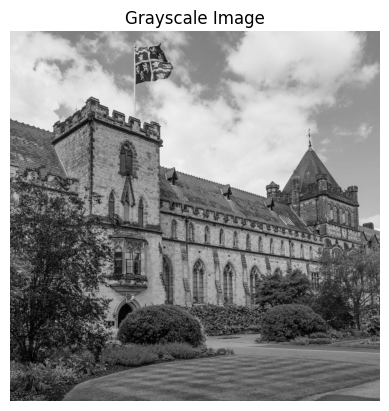

In [89]:
image_data = cv2.imread("school.jpg", 0)

plt.imshow(image_data, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

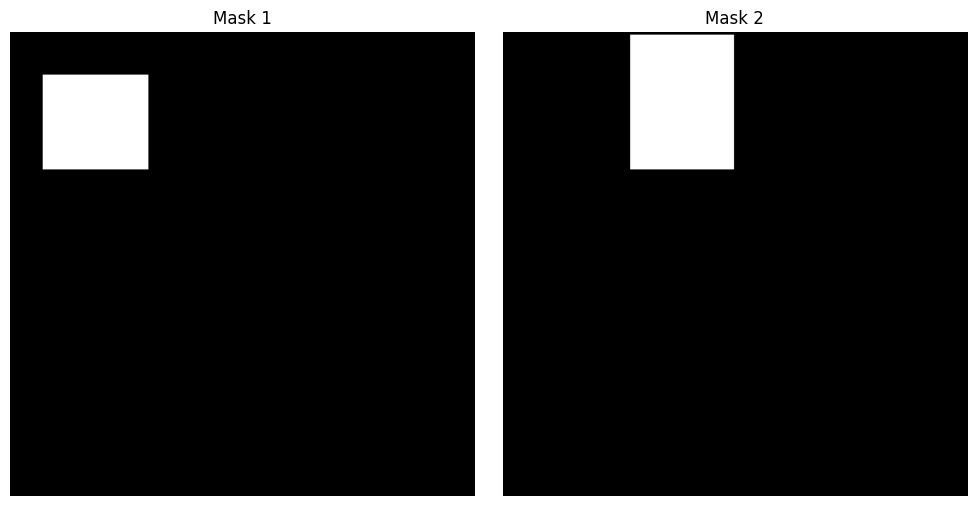

In [90]:
mask1 = np.zeros(image_data.shape[:2], np.uint8)
mask2 = np.zeros(image_data.shape[:2], np.uint8)

# draw rectangles
cv2.rectangle(mask1, (90, 120), (380, 380), 255, -1)
cv2.rectangle(mask2, (350, 10), (635, 380), 255, -1)

# display using matplotlib
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mask1, cmap='gray')
plt.title("Mask 1")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mask2, cmap='gray')
plt.title("Mask 2")
plt.axis("off")

plt.tight_layout()
plt.show()

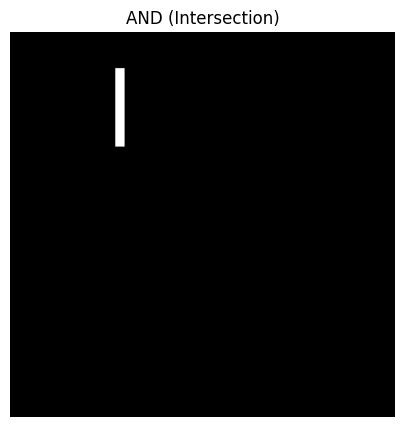

In [91]:
And = cv2.bitwise_and(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(And, cmap='gray')
plt.title("AND (Intersection)")
plt.axis("off")
plt.show()

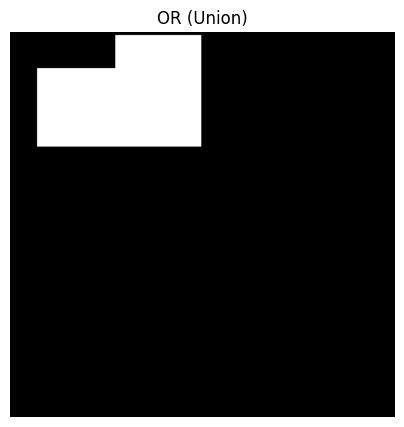

In [92]:
bitwiseOr = cv2.bitwise_or(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseOr, cmap='gray')
plt.title("OR (Union)")
plt.axis("off")
plt.show()

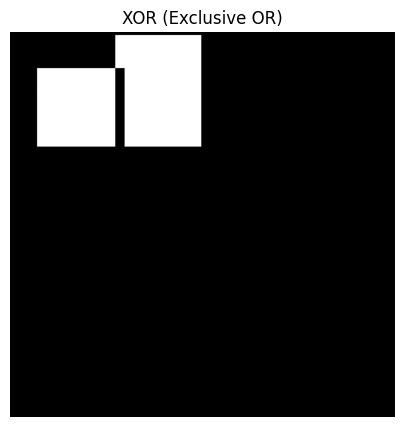

In [93]:
bitwiseXor = cv2.bitwise_xor(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseXor, cmap='gray')
plt.title("XOR (Exclusive OR)")
plt.axis("off")
plt.show()

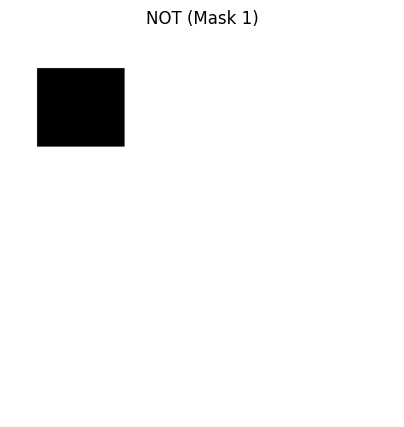

In [94]:
bitwiseNot_sq = cv2.bitwise_not(mask1)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseNot_sq, cmap='gray')
plt.title("NOT (Mask 1)")
plt.axis("off")
plt.show()

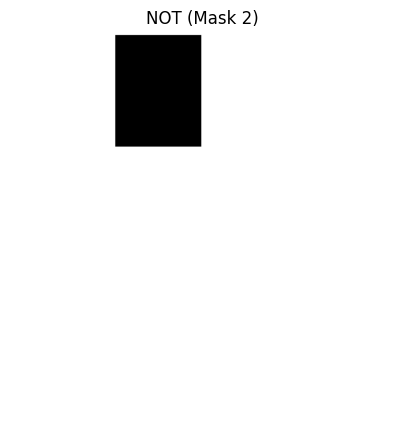

In [95]:
bitwiseNot_ell = cv2.bitwise_not(mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseNot_ell, cmap='gray')
plt.title("NOT (Mask 2)")
plt.axis("off")
plt.show()


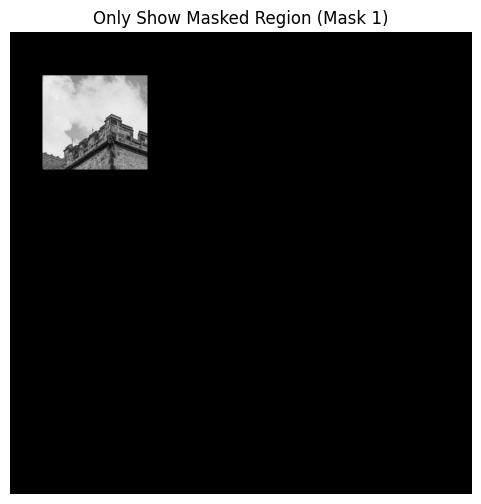

In [96]:
puppy = cv2.bitwise_and(image_data, image_data, mask=mask1)
puppy_rgb = cv2.cvtColor(puppy, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(puppy_rgb)
plt.title("Only Show Masked Region (Mask 1)")
plt.axis("off")
plt.show()

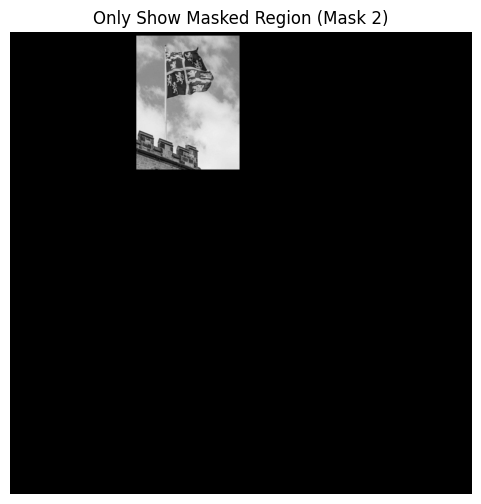

In [97]:
dog = cv2.bitwise_and(image_data, image_data, mask=mask2)

dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dog_rgb)
plt.title("Only Show Masked Region (Mask 2)")
plt.axis("off")
plt.show()

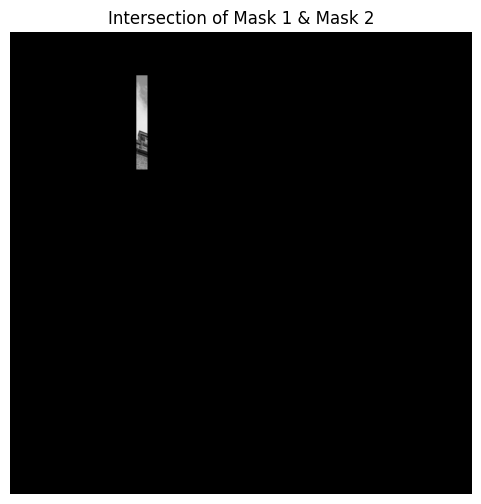

In [98]:
dog = cv2.bitwise_and(image_data, image_data, mask=And)
dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dog_rgb)
plt.title("Intersection of Mask 1 & Mask 2")
plt.axis("off")
plt.show()

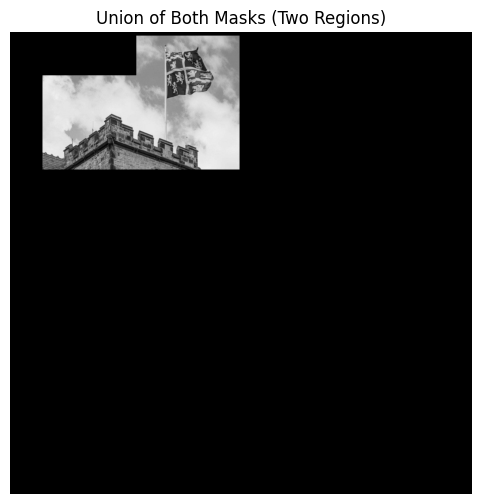

In [99]:
dog = cv2.bitwise_and(image_data, image_data, mask=bitwiseOr)
dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dog_rgb)
plt.title("Union of Both Masks (Two Regions)")
plt.axis("off")
plt.show()

TASK 1


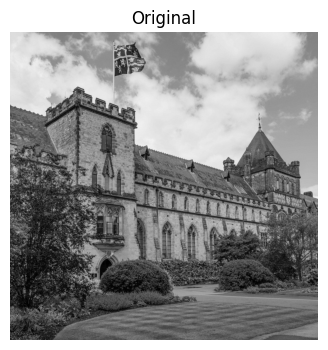

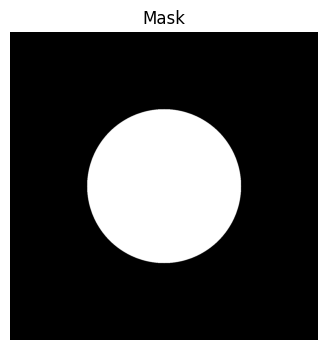

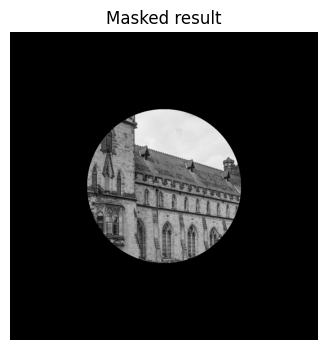

In [103]:
img = cv2.imread("school.jpg", cv2.IMREAD_GRAYSCALE)

h, w = img.shape
mask = np.zeros((h, w), dtype=np.uint8)

cx, cy = w // 2, h // 2
r = min(h, w) // 4

cv2.circle(mask, (cx, cy), r, 255, -1)

masked = cv2.bitwise_and(img, img, mask=mask)

show(img, "Original", cmap="gray")
show(mask, "Mask", cmap="gray")
show(masked, "Masked result", cmap="gray")

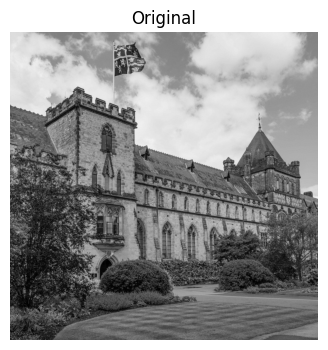

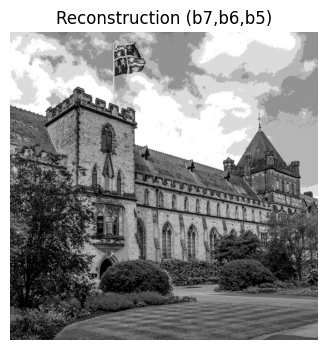

In [104]:
img = cv2.imread("school.jpg", cv2.IMREAD_GRAYSCALE)

planes = [(img >> i) & 1 for i in range(8)]

recon = np.zeros_like(img, dtype=np.uint8)
for i in [7, 6, 5]:
    recon = recon + (planes[i].astype(np.uint8) << i)

show(img, "Original", cmap="gray")
show(recon, "Reconstruction (b7,b6,b5)", cmap="gray")

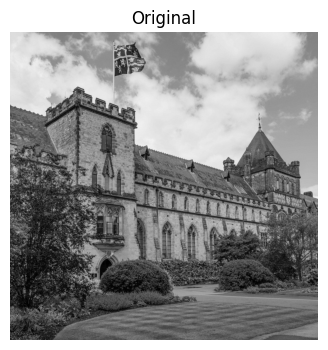

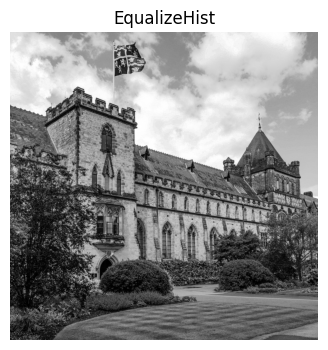

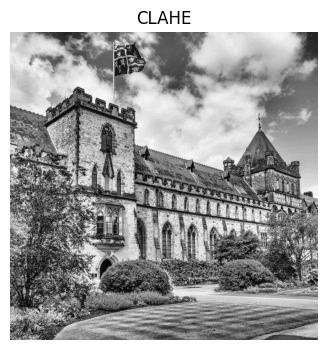

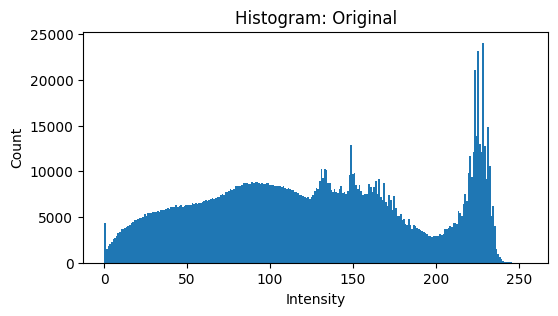

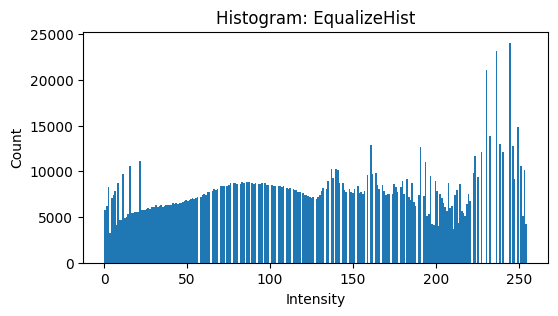

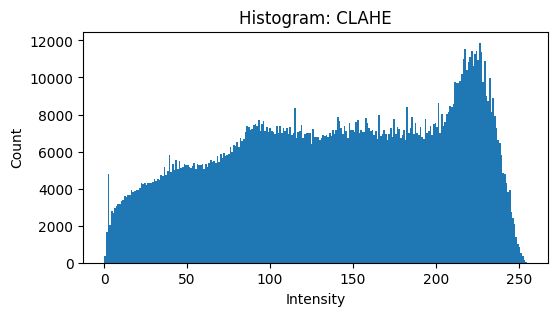

In [105]:
img = cv2.imread("school.jpg", cv2.IMREAD_GRAYSCALE)

eq = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

def plot_hist(a, title):
    plt.figure(figsize=(6,3))
    plt.hist(a.ravel(), bins=256, range=(0,255))
    plt.title(title)
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.show()

show(img, "Original", cmap="gray")
show(eq, "EqualizeHist", cmap="gray")
show(clahe, "CLAHE", cmap="gray")

plot_hist(img, "Histogram: Original")
plot_hist(eq, "Histogram: EqualizeHist")
plot_hist(clahe, "Histogram: CLAHE")

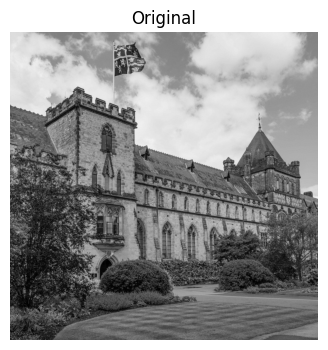

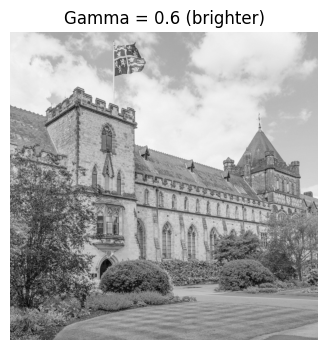

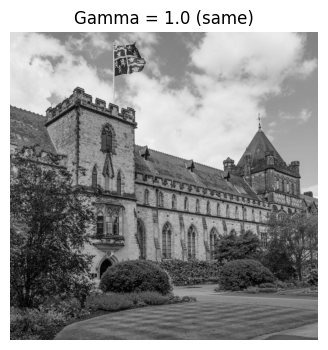

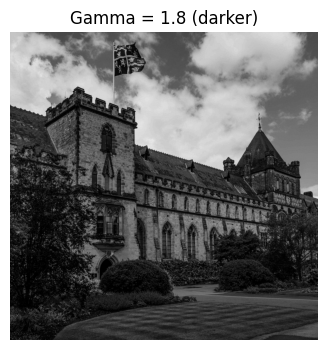

In [106]:
def apply_gamma(img, gamma):
    img = img.astype(np.float32) / 255.0
    out = np.power(img, gamma)
    return np.uint8(np.clip(out * 255.0, 0, 255))

img = cv2.imread("school.jpg", cv2.IMREAD_GRAYSCALE)
g1 = apply_gamma(img, 0.6)
g2 = apply_gamma(img, 1.0)
g3 = apply_gamma(img, 1.8)

show(img, "Original", cmap="gray")
show(g1, "Gamma = 0.6 (brighter)", cmap="gray")
show(g2, "Gamma = 1.0 (same)", cmap="gray")
show(g3, "Gamma = 1.8 (darker)", cmap="gray")

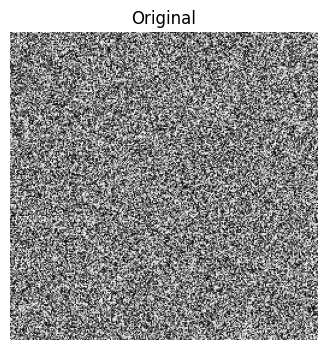

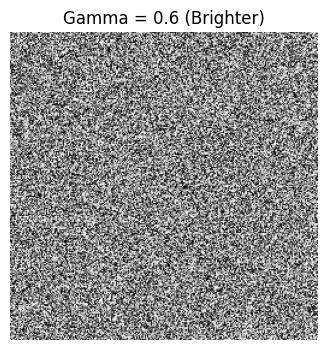

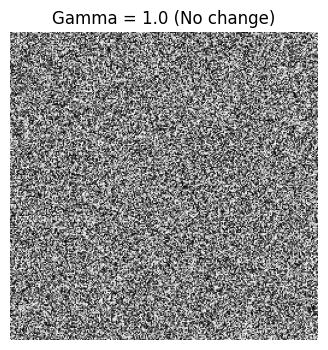

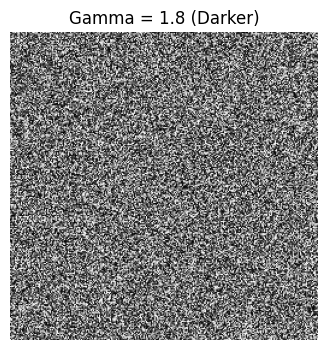

In [109]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show(img, title="", cmap=None):
    plt.figure(figsize=(4,4))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

def apply_gamma(img, gamma):
    img = img.astype(np.float32) / 255.0
    out = np.power(img, gamma)
    return np.uint8(np.clip(out * 255.0, 0, 255))

img = np.uint8(np.clip(60 + 80*np.random.rand(256,256), 0, 255))

g1 = apply_gamma(img, 0.6)  # brighten
g2 = apply_gamma(img, 1.0)  # no change
g3 = apply_gamma(img, 1.8)  # darken

show(img, "Original", cmap="gray")
show(g1, "Gamma = 0.6 (Brighter)", cmap="gray")
show(g2, "Gamma = 1.0 (No change)", cmap="gray")
show(g3, "Gamma = 1.8 (Darker)", cmap="gray")

TASK 1

I created a circular mask and used bitwise_and to keep only the circle area of the image. The black part hides the image and the white part shows it.

TASK 2
I split the image into bit-planes and rebuilt it using bits 7, 6, and 5. The image still looks similar because higher bits keep most information.

Task 3
I used histogram equalization and CLAHE to improve contrast. Both methods make the image clearer, but CLAHE looks more natural.


TASK 4
I used gamma correction. Gamma < 1 makes the image brighter, gamma = 1 keeps it the same, and gamma > 1 makes it darker.

DATASET task
I showed 10 random images from the folder in a grid with their names.